In [43]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import torch
from torch import nn
DEVICE="cpu"
sns.set_style()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "News Cycle"
sns.set_context("paper")

In [44]:
import os

In [45]:
root_path = "../runs/final-toy/model-error/"
dirs = os.listdir(root_path)
results = list()
for d in dirs:
    try:
        data = torch.load(root_path+d+"/last_model_meta.pt")
        data['config'].keys()
        results.append(
            {
                'iou': data['test_ious'][-1],
                'ade': data['test_ades'][-1],
                'fde': data['test_fdes'][-1],
                'training_loss': data['train_losses'][-1],
                'wheelbase': data['config']['wheelbase']
            }
        )
    except:
        pass
results = pd.DataFrame(results)
results

,iou,ade,fde,training_loss,wheelbase
0,0.784417,0.047444,0.112935,0.001539,0.2202
1,0.736950,0.063392,0.123657,0.001543,1.3202
2,0.780161,0.048429,0.109181,0.001537,0.4602
3,0.734474,0.064177,0.122845,0.001545,1.3702
4,0.779529,0.048475,0.111898,0.001530,0.4002
...,...,...,...,...,...
137,0.779327,0.048717,0.109666,0.001535,0.4802
138,0.786382,0.046394,0.107738,0.001530,0.2702
139,0.764918,0.053932,0.116357,0.001546,0.7802
140,0.758231,0.057102,0.115745,0.001542,1.0102


In [46]:
 data['config']['wheelbase']

0.5701999999999998

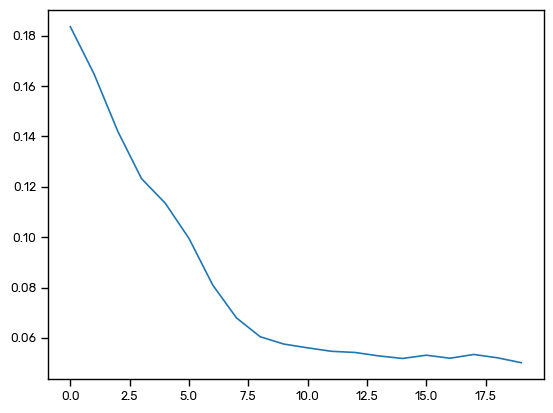

In [47]:
plt.plot(data['test_ades'])

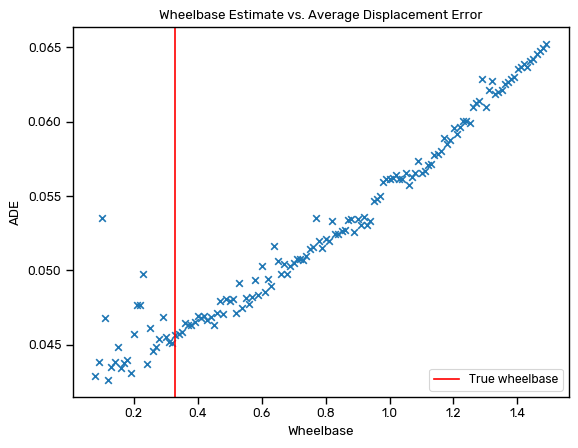

In [50]:
plt.scatter(robustness_results['wheelbase'], robustness_results['ade'], marker='x')
plt.xlabel("Wheelbase")
plt.ylabel("ADE")
plt.axvline(0.3302, color='red', label='True wheelbase')
plt.title("Wheelbase Estimate vs. Average Displacement Error")
plt.legend()

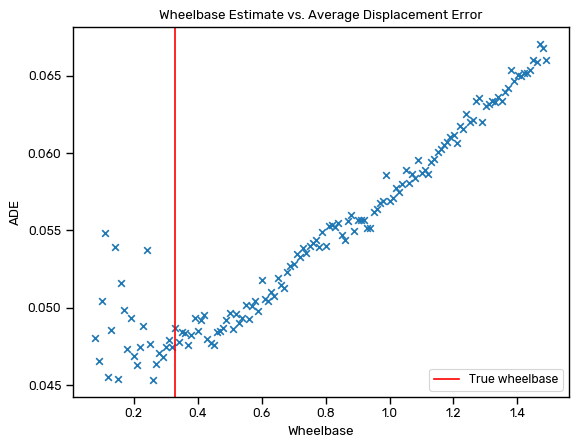

In [51]:
plt.scatter(results['wheelbase'], results['ade'], marker='x')
plt.xlabel("Wheelbase")
plt.ylabel("ADE")
plt.axvline(0.3302, color='red', label='True wheelbase')
plt.title("Wheelbase Estimate vs. Average Displacement Error")
plt.legend()

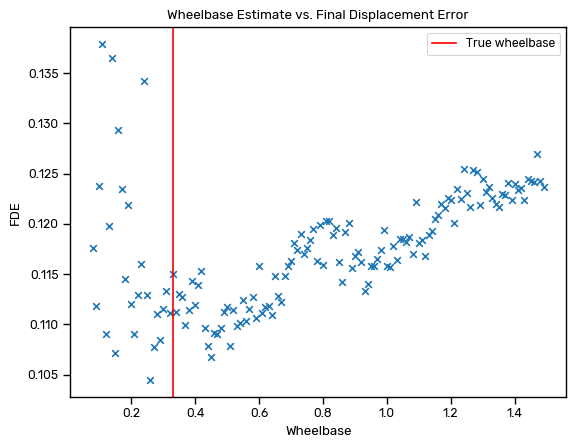

In [52]:
plt.scatter(results['wheelbase'], results['fde'], marker='x')
plt.xlabel("Wheelbase")
plt.ylabel("FDE")
plt.axvline(0.3302, color='red', label='True wheelbase')
plt.title("Wheelbase Estimate vs. Final Displacement Error")
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


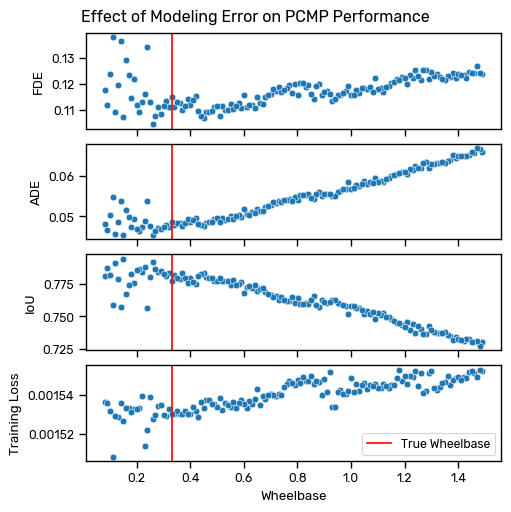

In [53]:
fig, axs = plt.subplots(4,1, figsize=(5,5), sharex='all', constrained_layout=True)
sns.scatterplot(data=results, x='wheelbase', y='fde', ax=axs[0])
axs[0].set_ylabel("FDE")
axs[0].axvline(0.3302, color='red', label='True Wheelbase')
sns.scatterplot(data=results, x='wheelbase', y='ade', ax=axs[1])
axs[1].set_ylabel("ADE")
axs[1].axvline(0.3302, color='red', label='True Wheelbase')
sns.scatterplot(data=results, x='wheelbase', y='iou', ax=axs[2])
axs[2].set_ylabel("IoU")
axs[2].axvline(0.3302, color='red', label='True Wheelbase')
sns.scatterplot(data=results, x='wheelbase', y='training_loss', ax=axs[3])
axs[3].set_ylabel("Training Loss")
axs[3].axvline(0.3302, color='red', label='True Wheelbase')
axs[3].set_xlabel("Wheelbase")
plt.legend()
fig.suptitle("Effect of Modeling Error on PCMP Performance")
plt.savefig("performance_vs_wheelbase.eps", bbox_inches='tight')

In [54]:
import scipy.stats as stats

In [55]:
stats.linregress(results['wheelbase'], results['ade'])

LinregressResult(slope=0.014110035826381607, intercept=0.04378792780755211, rvalue=0.952674382500017, pvalue=2.8162644611482327e-74, stderr=0.0003805245407371126, intercept_stderr=0.0003370519699559409)

In [56]:
stats.linregress(results['wheelbase'], results['iou'])

LinregressResult(slope=-0.03996791889338791, intercept=0.7932351132524538, rvalue=-0.935142517321184, pvalue=5.806278881130446e-65, stderr=0.0012796943016166805, intercept_stderr=0.0011334971575441078)

In [57]:
stats.linregress(results['wheelbase'], results['fde'])

LinregressResult(slope=0.007312102389092996, intercept=0.11152605129890682, rvalue=0.5106282688204274, pvalue=8.461904841332502e-11, stderr=0.0010405708009660196, intercept_stderr=0.0009216920350651692)

In [42]:
stats.linregress(results['wheelbase'], results['training_loss'])

LinregressResult(slope=1.617029024426372e-05, intercept=0.001527467906279799, rvalue=0.8339773679973719, pvalue=5.687298438896118e-38, stderr=9.042326105289022e-07, intercept_stderr=8.009296380380467e-07)